# Exploratory Data Analysis (EDA): Titanic Dataset

## 1. Load the Dataset

In [1]:
import pandas as pd

df = pd.read_csv('titanic.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


## 2. Data Cleaning

### Handle Missing Values

In [2]:
df.isnull().sum()

df['Age']=df['Age'].fillna(df['Age'].median())

df['Embarked']=df['Embarked'].fillna(df['Embarked'].mode()[0])

df.drop(columns='Cabin')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,0,3,"Spector, Mr. Woolf",male,27.0,0,0,A.5. 3236,8.0500,S
414,1306,1,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C
415,1307,0,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,S
416,1308,0,3,"Ware, Mr. Frederick",male,27.0,0,0,359309,8.0500,S


### Remove Duplicates

In [3]:
df=df.drop_duplicates()
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,0,3,"Spector, Mr. Woolf",male,27.0,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,0,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,0,3,"Ware, Mr. Frederick",male,27.0,0,0,359309,8.0500,NaN,S


### Identify and Manage Outliers

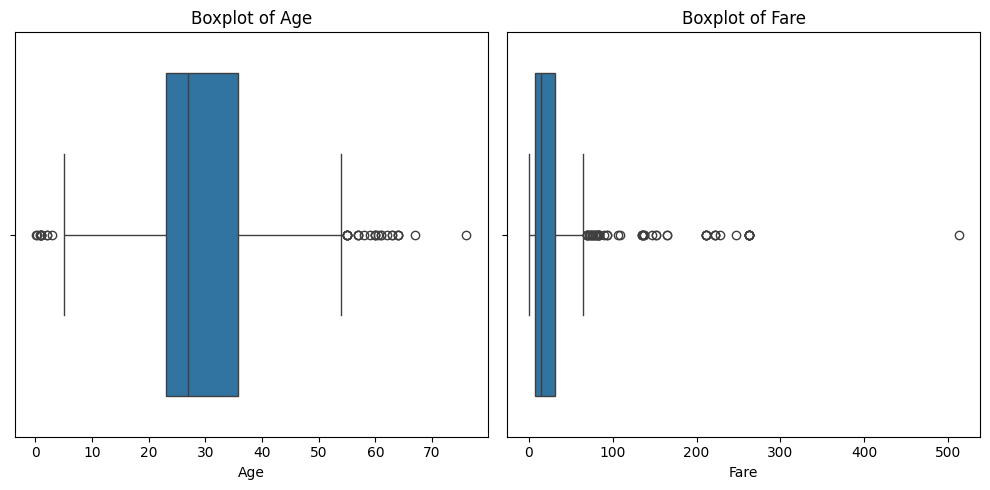

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt


plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
sns.boxplot(x=df['Age'])
plt.title("Boxplot of Age")

plt.subplot(1, 2, 2)
sns.boxplot(x=df['Fare'])
plt.title("Boxplot of Fare")

plt.tight_layout()
plt.show()

# Cap outliers in 'Fare' using the 99th percentile
fare_cap = df['Fare'].quantile(0.99)
df['Fare'] = df['Fare'].apply(lambda x: fare_cap if x > fare_cap else x)

## 3. Visualizations

### Bar Charts for Categorical Variables

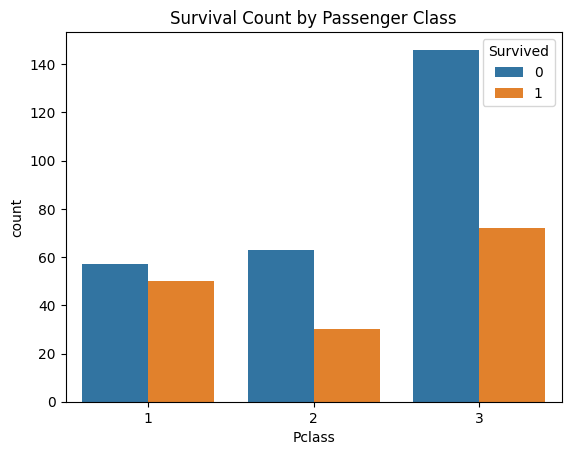

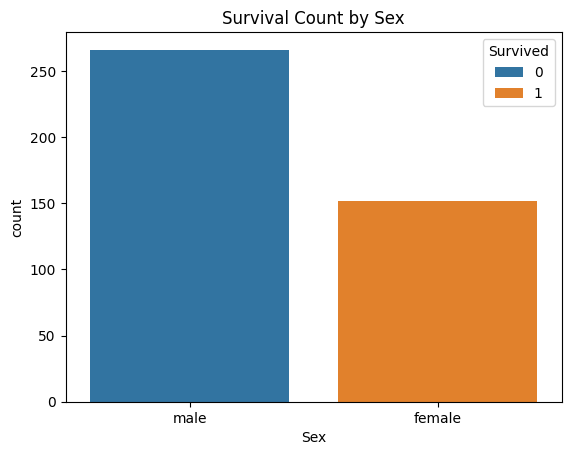

In [5]:
# Plot survival by class
sns.countplot(data=df, x='Pclass', hue='Survived')
plt.title('Survival Count by Passenger Class')
plt.show()

# Plot survival by sex
sns.countplot(data=df, x='Sex', hue='Survived')
plt.title('Survival Count by Sex')
plt.show()

### Histograms for Numeric Distributions

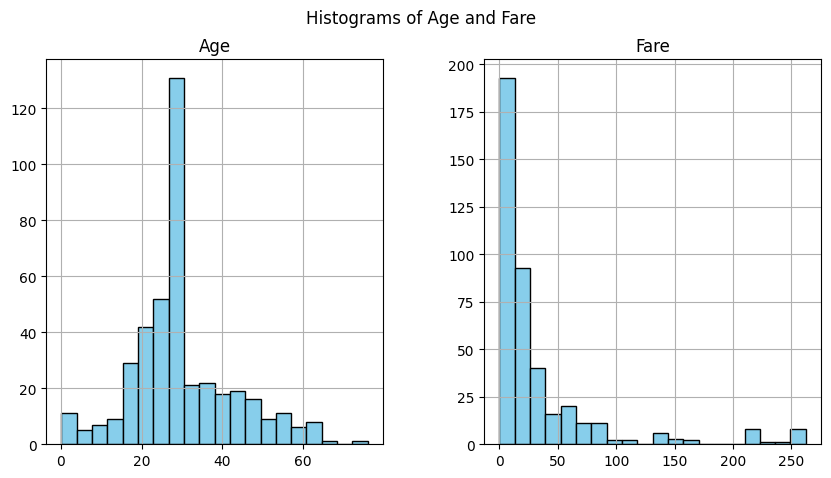

In [6]:
df[['Age', 'Fare']].hist(bins=20, figsize=(10, 5), color='skyblue', edgecolor='black')
plt.suptitle("Histograms of Age and Fare")
plt.show()

### Correlation Heatmap

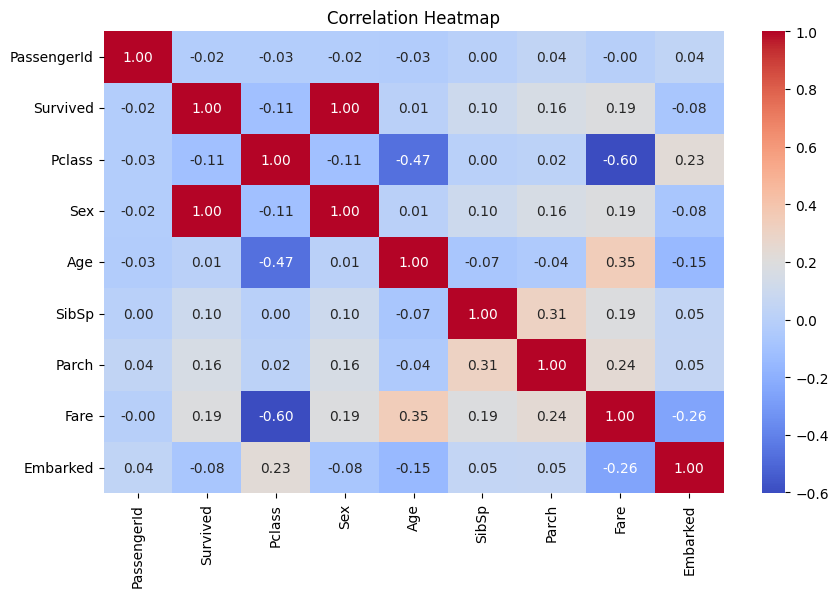

In [7]:
# Encode categorical variables for correlation
df_encoded = df.copy()
df_encoded['Sex'] = df_encoded['Sex'].map({'male': 0, 'female': 1})
df_encoded['Embarked'] = df_encoded['Embarked'].map({'C': 0, 'Q': 1, 'S': 2})

# Correlation heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(df_encoded.select_dtypes(include='number').corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

## 4. Summary of Insights

### 🔍 Key Insights from EDA

1. **Survival Rate**:
   - Women had a much higher survival rate than men.
   - First-class passengers had higher survival rates than second and third class.

2. **Missing Data**:
   - 'Age' had missing values imputed using the median.
   - 'Cabin' was dropped due to excessive missingness.

3. **Outliers**:
   - Outliers in 'Fare' were capped at the 99th percentile to reduce skew.

4. **Correlations**:
   - 'Sex' and 'Pclass' show notable correlations with 'Survived', suggesting they are important features.
